In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
sns.set_style('white')
import os

%matplotlib inline

In [3]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir, 'data')

columnnames = ['user_id','item_id','rating','timestamp']
df = pd.read_csv(os.path.join(data_dir,'u.data.csv' ), names=columnnames)

movie_titles = pd.read_csv(os.path.join(data_dir,'movie_id_titles' ))

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA 

### TO UNDERSTAND THE DATA BETTER 

In [7]:
# AVERAGE RATING BY THE TITLE 
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
# No. of rating by title
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(10)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [10]:
ratings['No_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(10)

,rating,No_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


<AxesSubplot:>

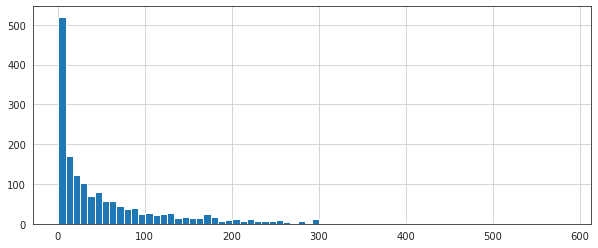

In [11]:
plt.figure(figsize=(10,4))
ratings['No_of_ratings'].hist(bins=70)

<AxesSubplot:>

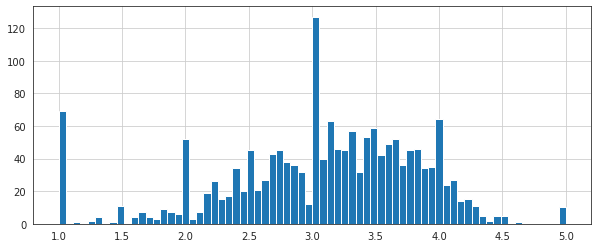

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

#### Except for few outliers, most part of the data follows a gaussian distribution.
 - most of the ratings are between 2.5 and 4
 
 - let us look at the join plot to understand the distribution 
 

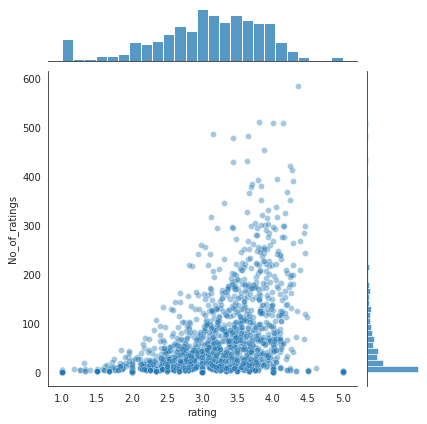

In [13]:
sns.jointplot(x='rating',y='No_of_ratings', data=ratings, alpha = 0.4)

## RECOMMENDING SIMILAR MOVIES 

#### CREATE A MATRIX WITH USER IDS ON ONE AXIS AND MOVIE TITLES ON OTHER AXIS. EACH CELL CORRESPONDS TO THE RATING GIVEN BY THE USER FOR THAT PARTICULAR MOVIE

#### THERE WILL BE A LOT OF NAN VALUES, THIS IS BECAUSE THE USER HAVE NOT RATED THAT PARTICULAR MOVIE OR HAVE NOT WATCHED THAT PARTICULAR MOVIE

In [14]:
moviematrix = df.pivot_table(index = 'user_id', columns='title',values='rating')
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#most rated movie
ratings.sort_values('No_of_ratings', ascending=False).head(10)

,rating,No_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [16]:
ratings.head()

,rating,No_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### let us consider the two movies star wars a scify movie and liar liar a comedy movie. let us see how they are correlated from above moviematrix


In [17]:
starwars_user_ratings = moviematrix['Star Wars (1977)']
liarliar_user_ratings = moviematrix['Liar Liar (1997)']

In [18]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [19]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

#### CHECKING OUT MOVIES THAT ARE SIMILAR TO STAR WARS AND LIAR LIAR. TO DO THIS WE USE CORRWITH METHOD TO FIND CLOSELY CORRELATED VALUES WITH STARWARS RATINGS AND LIAR LIAR RATINGS

In [20]:
similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)
similar_to_liarliar = moviematrix.corrwith(liarliar_user_ratings)

In [21]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


##### NOW IF WE SORT DATAFRAME BY CORRELATION, WE SHOULD GET MORE SIMILAR MOVIES. HOWEVER THERE ARE SOME RESULTS WHICH DONT REALLY MAKE SENSE. THIS IS BECAUSE THERE ARE MOVIES WHCIH ARE ONLY WATCHED ONCE BY USERS WHO WATCHED STARWARS. 

In [22]:
corr_starwars.sort_values(by='Correlation', ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0


#### joining with ratings to get count of ratings. we will pick the movies which has mininmum of 100 ratings givem

In [23]:
corr_starwars = corr_starwars.join(ratings['No_of_ratings'])
corr_starwars.head()

,Correlation,No_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [24]:
corr_starwars[corr_starwars['No_of_ratings']>=100].sort_values(by='Correlation', ascending=False).head()

,Correlation,No_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### BASED ON THIS THE NEXT MOVIE THAT IS RECOMMENDED FOR PEOPLE WHO WATCHED STARWARS IS "EMPIRE STRIKES BACK"

In [25]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['No_of_ratings'])
corr_liarliar[corr_liarliar['No_of_ratings']>=100].sort_values(by='Correlation', ascending=False).head()

,Correlation,No_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


#### FOR THE PEOPLE WHO HAS WATCHED THE LIAR LIAR THE NEXT RECOMMENDED MOVIE IS "BATMAN FOREVER"